In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/spotify_artist_info.csv')
df.sample(10)

,ids,names,popularity,followers,genres,first_release,last_release,num_releases,num_tracks,monthly_listeners
25861,4qyLtSzXM6EwX5L5vytLZL,ユウスケ,8,97,NaN,-1,-1,0,0,2155.0
22281,4xDWboxMAdfuz7oZyVifKL,stephen lawrence,1,48,NaN,2021,2021,1,27,85.0
1059,0qR2gOK1BntA7dX9FRbEz1,intestinal disgorge,8,2017,"cybergrind, goregrind, noisecore, pornogrind",2012,2021,6,29,1660.0
9318,2QOdjDyrlrQmUZNZpWYzos,the upper tunist,0,187,NaN,2018,2023,14,1,51.0
30895,08RCPFNadNhIh0zkmExYao,maria chiara,9,557,"classical soprano, italian soprano",1969,2020,4,33,4369.0
5011,6U3MpbrlrjYzUn0oeWNgAD,mike zarin,14,130,NaN,-1,-1,0,0,3053.0
8034,3UiOg9UqiVlcr0YN7BJFwU,engledrys,6,147,talentkonkurrence,2014,2014,1,20,2355.0
3069,6axz9ospjdu7PZtOScudDZ,sons of aliens,0,89,NaN,2011,2011,1,5,175.0
31012,794TDRDYk888yxompvZsXm,planet gemini,0,83,NaN,2002,2024,17,6,28.0
20889,3cqwHzqtHSvngVHKbbob4H,distractions,0,71,NaN,1997,2020,5,4,44.0


In [3]:
df.info()
#df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37000 entries, 0 to 36999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ids                37000 non-null  object 
 1   names              37000 non-null  object 
 2   popularity         37000 non-null  int64  
 3   followers          37000 non-null  int64  
 4   genres             12437 non-null  object 
 5   first_release      37000 non-null  int64  
 6   last_release       37000 non-null  int64  
 7   num_releases       37000 non-null  int64  
 8   num_tracks         37000 non-null  int64  
 9   monthly_listeners  36988 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.8+ MB


In [4]:
df.describe()

,popularity,followers,first_release,last_release,num_releases,num_tracks,monthly_listeners
count,37000.000000,3.700000e+04,37000.000000,37000.000000,37000.000000,37000.000000,3.698800e+04
mean,9.537486,3.966586e+04,1678.249162,1685.222027,6.124216,5.058514,1.096624e+05
std,14.112742,7.126790e+05,745.692094,748.741395,6.688222,11.699609,1.246455e+06
min,0.000000,0.000000e+00,-1.000000,-1.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,2.900000e+01,1994.000000,2008.000000,1.000000,1.000000,2.000000e+01
50%,2.000000,2.020000e+02,2010.000000,2019.000000,3.000000,2.000000,2.630000e+02
75%,15.000000,1.726000e+03,2017.000000,2023.000000,9.000000,6.000000,5.072500e+03
max,92.000000,8.726594e+07,2024.000000,2024.000000,20.000000,810.000000,8.135858e+07


### 결측값 확인

In [5]:
#결측치 구하기 1
# df.isnull().sum()

#결측치 구하기 2
def missing_data(data):
  total = data.isnull().sum().sort_values(ascending = False)
  percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
  return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
genres,24563,66.386486
monthly_listeners,12,0.032432
ids,0,0.000000
names,0,0.000000
popularity,0,0.000000
followers,0,0.000000
first_release,0,0.000000
last_release,0,0.000000
num_releases,0,0.000000
num_tracks,0,0.000000


### Cleaning 함수
- Genres: 없을 시 'none'
- monthly_listeners: 없을 시 '0'
- num_releases, num_tracks: 없을 시(0일 경우): 행 삭제
- first_release, last_release: 없을 시(-1일 경우): 행 삭제

In [6]:
# # print(df.dropna(axis=0))
df1 = df[df['first_release'] != -1]
df1 = df1.fillna({"monthly_listeners": "0", "genres": "none"})
df1 = df1.query('num_releases != 0 | num_tracks != 0')
df1

,ids,names,popularity,followers,genres,first_release,last_release,num_releases,num_tracks,monthly_listeners
0,68JRsR0O5ynf8xhu2jk2no,eqd,6,1974,none,2007,2023,10,2,1444.0
1,5VvZ6Br2O5ffnhkZt2HE8Q,チキンガーリックステーキ,3,140,none,2004,2010,12,2,231.0
2,2P3aLwJ41aRYkyFFw2FRM7,sam concepcion,45,168497,opm,2007,2023,20,1,583900.0
3,3ZzXi1Y1BvnvKJSVvzU2iP,vibemares,0,151,none,1996,1997,2,5,101.0
4,2ZC9B5qSrV48WOrOujZkNC,lantinor,0,1,none,2019,2019,1,12,0.0
...,...,...,...,...,...,...,...,...,...,...
36995,4TMRBn1plXqjzUY7o3yOXQ,phil maggio,1,228,none,2011,2020,8,1,175.0
36996,4bl3Yv4KUEz0eeq2CufBtP,francesca beghe,8,186,none,1991,2022,7,1,2794.0
36997,1UDOAzRwVvdUPrFN5Whz8p,zelf,0,1,none,2018,2019,15,1,0.0
36998,4KiROF7429B2u0msF92ueV,electryxeed,1,316,none,2011,2017,3,3,391.0


In [7]:
df1.isnull().sum()

ids                  0
names                0
popularity           0
followers            0
genres               0
first_release        0
last_release         0
num_releases         0
num_tracks           0
monthly_listeners    0
dtype: int64

In [10]:
#change monthly_listeners dtype from object to int64 to enable calculations
df1['monthly_listeners'] = df1['monthly_listeners'].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30907 entries, 0 to 36999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ids                30907 non-null  object
 1   names              30907 non-null  object
 2   popularity         30907 non-null  int64 
 3   followers          30907 non-null  int64 
 4   genres             30907 non-null  object
 5   first_release      30907 non-null  int64 
 6   last_release       30907 non-null  int64 
 7   num_releases       30907 non-null  int64 
 8   num_tracks         30907 non-null  int64 
 9   monthly_listeners  30907 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 2.6+ MB


In [16]:
# Analyzing popularity vs. monthly listeners
corr_data = df1[['popularity', 'monthly_listeners', 'followers', 'num_releases', 'num_tracks']].corr()
corr_data

,popularity,monthly_listeners,followers,num_releases,num_tracks
popularity,1.000000,0.339195,0.223812,0.614881,-0.040078
monthly_listeners,0.339195,1.000000,0.807671,0.153944,-0.012892
followers,0.223812,0.807671,1.000000,0.101396,-0.005804
num_releases,0.614881,0.153944,0.101396,1.000000,-0.123912
num_tracks,-0.040078,-0.012892,-0.005804,-0.123912,1.000000


In [ ]:
# Group by genres and get average popularity
avg_popularity = df1.groupby('genres')['popularity'].mean().reset_index()
avg_popularity

,genres,popularity
0,21st century classical,11.666667
1,"21st century classical, american 21st century ...",50.000000
2,"21st century classical, american contemporary ...",4.000000
3,"21st century classical, avant-garde, contempor...",16.000000
4,"21st century classical, baltic classical, cont...",26.000000
...,...,...
7281,zouk,15.666667
7282,"zouk, zouk riddim",17.000000
7283,zurich indie,24.500000
7284,zxc,29.000000


In [ ]:
# Group by release years and count the number of releases
num_releases = df1.groupby('first_release').size().reset_index()
num_releases

,first_release,0
0,1877,1
1,1883,1
2,1888,1
3,1899,3
4,1900,4
...,...,...
99,2020,1719
100,2021,1385
101,2022,1049
102,2023,925


In [ ]:
# Popularity by genres
avg_popularity = df1.groupby('genres')['popularity'].mean().reset_index()
avg_popularity

,genres,popularity
0,21st century classical,11.666667
1,"21st century classical, american 21st century ...",50.000000
2,"21st century classical, american contemporary ...",4.000000
3,"21st century classical, avant-garde, contempor...",16.000000
4,"21st century classical, baltic classical, cont...",26.000000
...,...,...
7281,zouk,15.666667
7282,"zouk, zouk riddim",17.000000
7283,zurich indie,24.500000
7284,zxc,29.000000


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

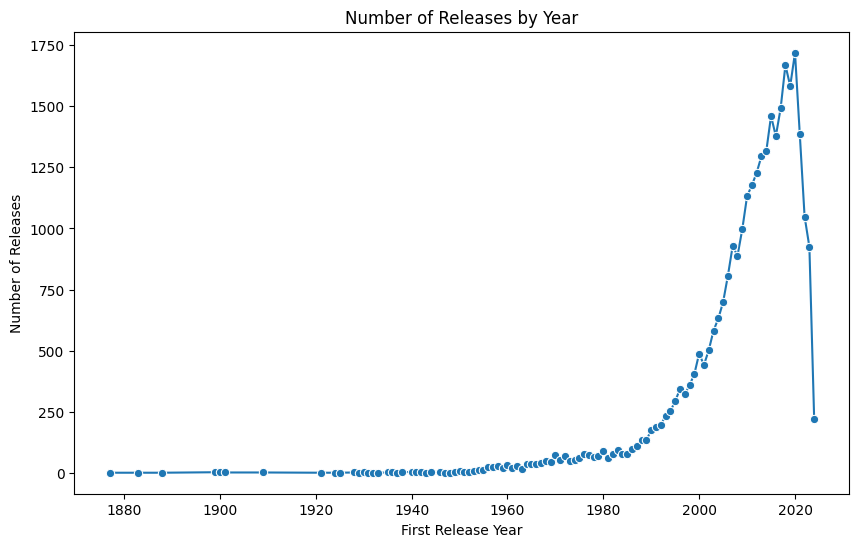

In [ ]:
# Line Plot: Number of releases by year
plt.figure(figsize=(10, 6))
releases_by_year = df1.groupby('first_release').size().reset_index(name='num_releases')
sns.lineplot(data=releases_by_year, x='first_release', y='num_releases', marker='o')
plt.title('Number of Releases by Year')
plt.xlabel('First Release Year')
plt.ylabel('Number of Releases')
plt.show()

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

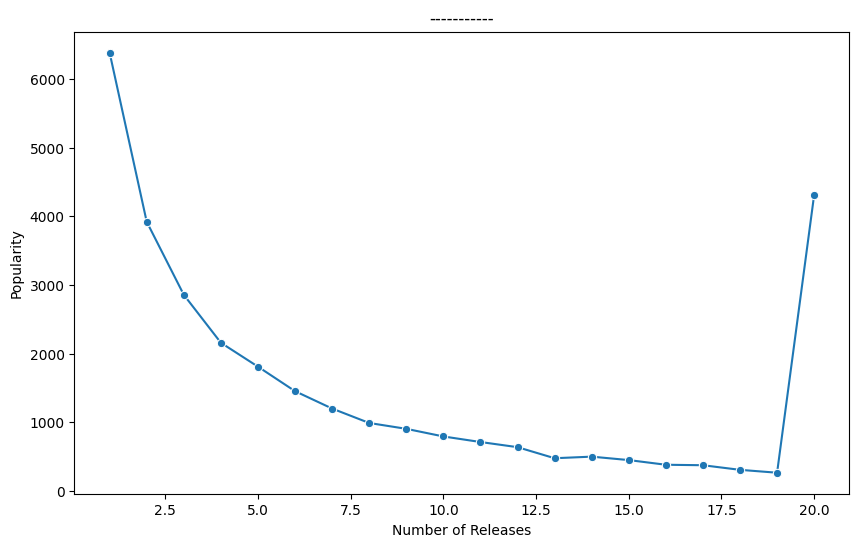

In [19]:
# Line Plot: Number of releases by year
plt.figure(figsize=(10, 6))
releases_by_year = df1.groupby('num_releases').size().reset_index(name='popularity')
sns.lineplot(data=releases_by_year, x='num_releases', y='popularity', marker='o')
plt.title('-----------')
plt.xlabel('Number of Releases')
plt.ylabel('Popularity')
plt.show()

In [ ]:
df1['monthly_listeners_grouped'] = (df1['monthly_listeners'] // 1000) * 1000
df1['monthly_listeners_grouped']

0          1000
1             0
2        583000
3             0
4             0
          ...  
36995         0
36996      2000
36997         0
36998         0
36999         0
Name: monthly_listeners_grouped, Length: 30907, dtype: int64

<Axes: title={'center': 'Monthly Listeners Box Plot'}>

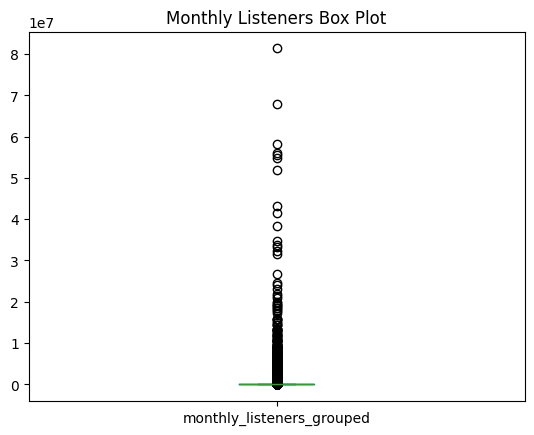

In [ ]:
df2 = df1[df1['monthly_listeners_grouped'] != 0]
plt.title('Monthly Listeners Box Plot')
df2['monthly_listeners_grouped'].plot(kind='box')

popularity              Axes(0.125,0.712609;0.168478x0.167391)
followers            Axes(0.327174,0.712609;0.168478x0.167391)
first_release        Axes(0.529348,0.712609;0.168478x0.167391)
last_release         Axes(0.731522,0.712609;0.168478x0.167391)
num_releases            Axes(0.125,0.511739;0.168478x0.167391)
num_tracks           Axes(0.327174,0.511739;0.168478x0.167391)
monthly_listeners    Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

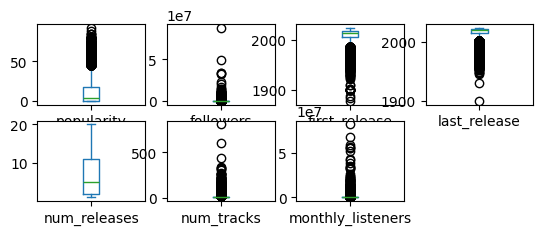

In [ ]:
df1.plot(kind='box', subplots=True, layout=(4,4), sharex=False)

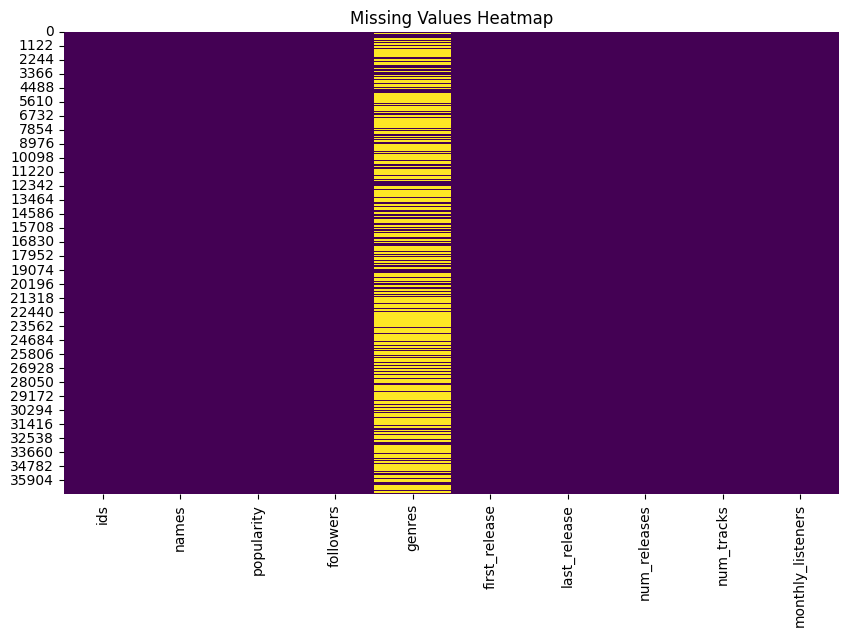

In [ ]:
# Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

<Axes: >

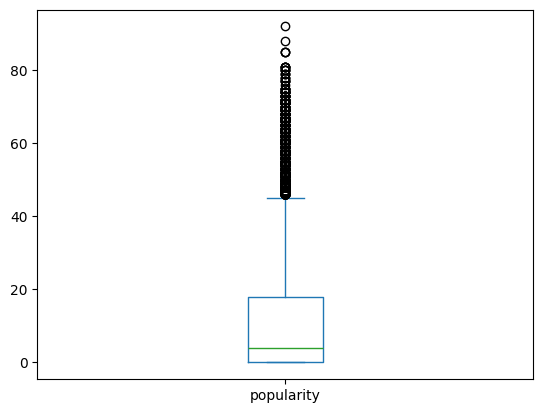

In [ ]:
df1['popularity'].plot(kind='box')